# Data Acquisition

In [2]:
# import pandas
import pandas as pd
df = pd.read_json('votes.json')
# print out the DataFrame
print(df)

          party  infants  water  budget  physician  salvador  religious  \
0    republican        0      1       0          1         1          1   
1    republican        0      1       0          1         1          1   
2      democrat        0      1       1          0         1          1   
3      democrat        0      1       1          0         1          1   
4      democrat        1      1       1          0         1          1   
..          ...      ...    ...     ...        ...       ...        ...   
430  republican        0      0       1          1         1          1   
431    democrat        0      0       1          0         0          0   
432  republican        0      1       0          1         1          1   
433  republican        0      0       0          1         1          1   
434  republican        0      1       0          1         1          1   

     satellite  aid  missile  immigration  synfuels  education  superfund  \
0            0    0   

# Numerical EDA

In [3]:
# use head() print out 5 rows of the DataFrame
print(df.head())

        party  infants  water  budget  physician  salvador  religious  \
0  republican        0      1       0          1         1          1   
1  republican        0      1       0          1         1          1   
2    democrat        0      1       1          0         1          1   
3    democrat        0      1       1          0         1          1   
4    democrat        1      1       1          0         1          1   

   satellite  aid  missile  immigration  synfuels  education  superfund  \
0          0    0        0            1         0          1          1   
1          0    0        0            0         0          1          1   
2          0    0        0            0         1          0          1   
3          0    0        0            0         1          0          1   
4          0    0        0            0         1          0          1   

   crime  duty_free_exports  eaa_rsa  
0      1                  0        1  
1      1                  0     

In [5]:
# use describe() to check the summarize numerical statistics of the data
print(df.describe())

          infants       water      budget   physician    salvador   religious  \
count  435.000000  435.000000  435.000000  435.000000  435.000000  435.000000   
mean     0.429885    0.558621    0.606897    0.406897    0.521839    0.650575   
std      0.495630    0.497123    0.489002    0.491821    0.500098    0.477337   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        satellite         aid     missile  immigration    synfuels  \
count  435.000000  435.000000  435.000000   435.000000  435.000000   
mean     0.581609    0.590805    0.526437     0.512644    0.344828   
std      0.493863    0.492252    0.499876     0.500416    0.

In [6]:
# use info() to check the types of columns in the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

# Visual EDA

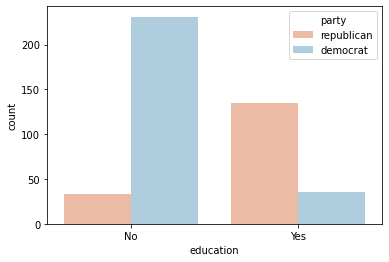

In [9]:
# import Seaborn's countplot and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# Fit a k-Nearest neighbors classifier

In [10]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create target and data arrays
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier and fit with both arrays
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

# Predict k-Nearest neighbors with training data set

In [12]:
# import train_test_split for split data to test and training data
from sklearn.model_selection import train_test_split

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the output
prediction = knn.predict(X_train)
print("Prediction: {}".format(prediction))

Prediction: ['democrat' 'democrat' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'republican' 'democrat' 'democrat' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'republican' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'republican' 'republican'
 'republican' 'democrat' 'republican' 'democrat' 'democrat' 'republica

# Check model accuracy with test data set

In [13]:
# use knn.score to show the accuracy with test data set
print(knn.score(X_test, y_test))

0.9540229885057471
